In [ ]:
# Влияние вывоза капитала на экономику принимающей страны.

In [ ]:
# The impact of the export of capital on the economy of the host country.

In [ ]:
# https://eprints.soas.ac.uk/22537/1/Banaji_Grossman_excerpt.pdf

In [ ]:
# https://www.investopedia.com/terms/c/capital-outflow.asp#:~:text=Capital%20outflow%20is%20the%20movement,of%20political%20or%20economic%20instability.

In [ ]:
# https://webarchiv.ethz.ch/vwl/down/folien/Principles_Macro_08/Lecture09.pdf

In [ ]:
"""

Capital outflow is the movement of assets out of a country. 
Capital outflow is considered undesirable as it is often the 
result of political or economic instability. The flight of assets
occurs when foreign and domestic investors sell off their holdings 
in a particular country because of perceived weakness in the nation's 
economy and the belief that better opportunities exist abroad.

"""

In [ ]:
"""

BOP = Current Account + Financial Account + Capital Account + Balancing item

"""

In [ ]:
# if the supply of loanable funds increases => fed prints more money => 
# the fed buys treasury notes => gives the us gov free $ 
# 

In [ ]:
# Money Market Chart 

In [ ]:
# interest rates and Ruble exchange rate 

In [ ]:
# theory: as interest rates go up => ruble increases in value => negative correlation

In [ ]:
# scrape data from CBRF 
# https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=3.07.2009&UniDbQuery.To=1.03.2022

In [ ]:
!pip3 install selenium

In [20]:
import pandas as pd

import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import yahoofinancials
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import zoom
import numpy as np

import requests
import urllib.request
import time
from bs4 import BeautifulSoup
from selenium import webdriver

/tmp/ipykernel_23582/1694415762.py:14: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


In [21]:
# get USD/RUB historical data
yf.pdr_override() 
df = pdr.get_data_yahoo("USDRUB=X", start="2009-07-01", end="2022-04-11")

[*********************100%***********************]  1 of 1 completed


In [22]:
#yield curve CBRF now
url = 'https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=3.07.2009&UniDbQuery.To=1.03.2022'   

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

In [23]:
raw = soup.findAll('td',{"class":""})

In [24]:
index = []
vals = []

In [25]:
# separate index from vals in soup

def separate(raw):
    
    for i in range(len(raw)):
        
        if i % 2 == 0:
            index.append(raw[i].decode_contents())
            
        else:
            vals.append(raw[i].decode_contents())
    

In [26]:
separate(raw)

In [27]:
# remove comma from string and convert to float

rates = []

def removeComma(x):
    for i in range(len(vals)):
    
        y = float(vals[i].replace(',', "."))
        
        rates.append(y)

In [28]:
removeComma(vals)

In [29]:
#rates = rates[0::3]
#rates[-1]

In [30]:
# reversing data 
index=index[::-1]
rates=rates[::-1]

In [31]:
df1 = pd.DataFrame({'index': index, 'rates': rates})

In [32]:
# original array:
x = df1["rates"]

# set resample ratio:
resample_ratio = len(df) / len(x)

# resample array:
y = zoom(x, resample_ratio, order=0)

In [33]:
# sanity check
print(len(y))
print(len(df))

3329
3329


In [34]:
df1 = pd.DataFrame({'rates': y})

<AxesSubplot:>

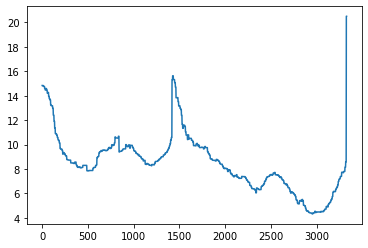

In [35]:
df1["rates"].plot()

<AxesSubplot:xlabel='Date'>

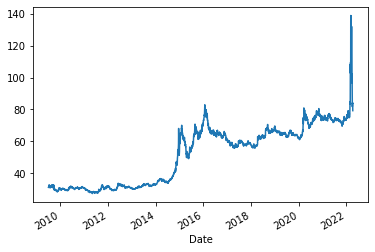

In [36]:
# drop outlier and plot
df.at["2016-01-06","Close"] = 74
df['Close'].plot()

In [38]:
df['Rates'] = df1['rates'].values

In [39]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [54]:
def plot_data(data_df, normalize,log_plot):
    data_df = data_df.dropna()

    # normalize df
    if normalize == True:
        data_df = (data_df - data_df.mean()) / data_df.std()
    else:
        pass

    for column in data_df:

        ax = data_df[column].plot(figsize=(14, 10), legend=True, logy=log_plot, grid=True)

    ax.get_legend().set_bbox_to_anchor((1.3, 1))

    #return data_df

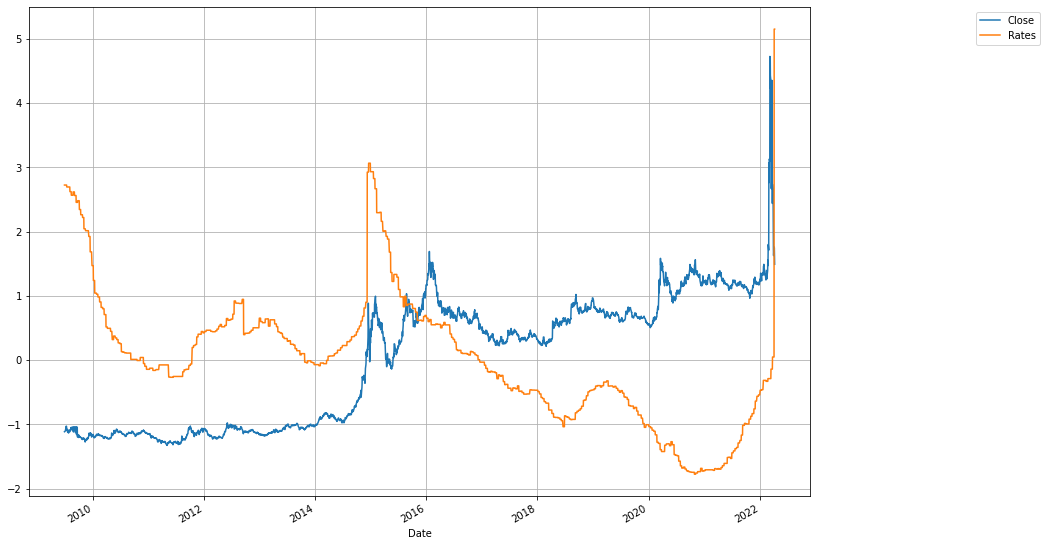

In [55]:
normalize = True
log_plot = False

plot_data(df, normalize, log_plot)

In [53]:
# calculate correlation without shift
sum_corr = df.corr().sum().sort_values(ascending=True).index.values
df[sum_corr].corr()

,Close,Rates
Close,1.000000,-0.473471
Rates,-0.473471,1.000000


In [ ]:
# correlation to Captital outflow (BOP) to other indicators such as interest rates & exchange rates
# https://www.cbr.ru/vfs/eng/statistics/credit_statistics/direct_investment/21e-dir_inv.xlsx

In [ ]:
# Hypothesis: it will be a positive correlation in regards to rate of change 

# when USD/RUB % change == +  =>  capital inflow is + 


# Yes, as the exchange rate goes up, it becomes more expensive for investors to buy 
# rubles, however, as the exchange rate goes up, so does confidence in the 
# russian economy. 


# logically however, the correlation would be inverse because, investors get a good 
# deal on Russian assets when the Ruble is weaker to the dollar. 



In [114]:
df = pd.read_csv("DI_CBRF.csv")
df = df.T

In [124]:
df.head()

,0
Q1 1994,-67
Q2 1994,-51
Q3 1994,-52
Q4 1994,-209
Q1 1995,-70


In [116]:
df.drop(index=df.iloc[4::5].index.tolist(), inplace=True)

In [123]:
df.head()

,0
Q1 1994,-67
Q2 1994,-51
Q3 1994,-52
Q4 1994,-209
Q1 1995,-70


In [ ]:
df.to_csv("test.csv")

In [ ]:
from datetime import datetime

def diff_month(d1, d2):
    return (d2.year - d1.year) * 365 + d2.day - d1.day

diff_month(datetime(2009,6,30),datetime(2016,1,1))

In [ ]:
# correlation to Captital outflow (BOP) to other indicators such as interest rates & exchange rates

In [ ]:
# correlation of Captial outflow to GDP to Debt Ratio (more macro economic long term )